# Performance-Based Ranking

In this example, you will get familiarized with the ranking of entities (assimilated to two-class classifiers), based on their performances (normalized confusion matrices) and a score. Not all scores are suitable to rank, but all ranking scores do. If you want to use a score that does not belong to this family, first be sure that the performance ordering induced by it satisfies all the axioms of performance-based ranking (see Piérard et al., 2025).

In [1]:
from sorbetto.core.entity import Entity
from sorbetto.performance.two_class_classification_performance import TwoClassClassificationPerformance
from sorbetto.ranking.ranking_induced_by_score import RankingInducedByScore
from sorbetto.ranking.ranking_score import RankingScore
from sorbetto.tile.tile import Tile
from sorbetto.parameterization import ParameterizationDefault
from sorbetto.performance.distribution.uniform_distribution_of_two_class_classification_performances import UniformDistributionOfTwoClassClassificationPerformances
from sorbetto.performance.finite_set_of_two_class_classification_performances import FiniteSetOfTwoClassClassificationPerformances
from sorbetto.annotation.annotation_frontiers_between_rankings import AnnotationFrontiersBetweenRankings
from sorbetto.annotation.annotation_text import AnnotationText

from random import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backend_bases import MouseButton

In [2]:
ca = Entity( TwoClassClassificationPerformance(0.4, 0.1, 0.2, 0.3), 'Classifier "A"' )
cb = Entity( TwoClassClassificationPerformance(0.3, 0.2, 0.15, 0.35), 'Classifier "B"' )
cc = Entity( TwoClassClassificationPerformance(0.2, 0.3, 0.1, 0.4), 'Classifier "C"' )
cd = Entity( TwoClassClassificationPerformance(0.45, 0.05, 0.1, 0.4), 'Classifier "D"' )
ce = Entity( TwoClassClassificationPerformance(0.1, 0.4, 0.45, 0.05), 'Classifier "E"' )

In [3]:
entities = [ ca, cb, cc, cd, ce ]
score = RankingScore.getF ( beta=1.0 )
ranking = RankingInducedByScore ( entities, score )

In [4]:
print ( ranking.values )

[0.66666667 0.66666667 0.66666667 0.84210526 0.10526316]


In [5]:
print ( ranking.getAllMinRanks() )

[3 2 3 1 5]


In [6]:
print ( ranking.getAllMaxRanks() )

[4 2 4 1 5]


In [7]:
for r in range ( len ( entities ) ) :
    entities_at_rank_r = ranking.getEntitiesAtRank ( r+1 )
    names = [ e.name for e in entities_at_rank_r ]
    print ( r+1, ':', names )

1 : ['Classifier "D"']
2 : ['Classifier "B"']
3 : ['Classifier "A"', 'Classifier "C"']
4 : ['Classifier "A"', 'Classifier "C"']
5 : ['Classifier "E"']


{}


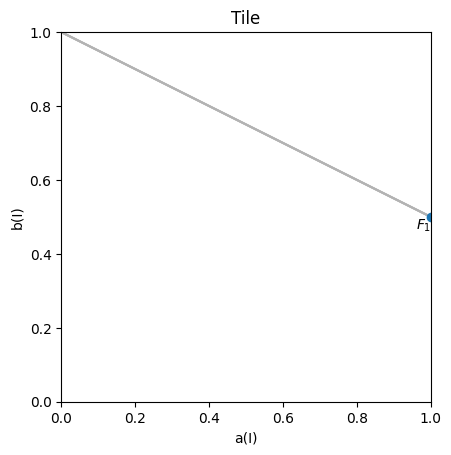

In [8]:
parameterization = ParameterizationDefault ()
min_x, max_x = parameterization.getBoundsParameter1 ()
min_y, max_y = parameterization.getBoundsParameter2 ()
extent = [ min_x, max_x, min_y, max_y ]

tile = Tile ( parameterization=parameterization, name="Tile" )
performances = FiniteSetOfTwoClassClassificationPerformances ( [ e.performance for e in entities ] )
annotation = AnnotationFrontiersBetweenRankings ( performances )
tile.appendAnnotation ( annotation )
annotation = AnnotationText ( score, score.label )
tile.appendAnnotation ( annotation )

fig, ax = plt.subplots ()
tile.draw ( fig, ax )
plt.show()

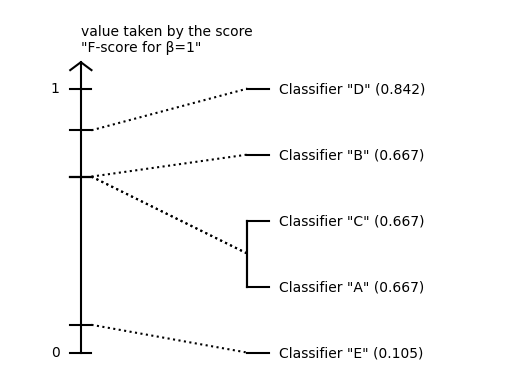

In [9]:
fig, ax = plt.subplots ()
ranking.draw ( fig, ax )
plt.show ()